In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [26]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import math
import random

numOfQubits = 4
readoutBits = numOfQubits
qreg = QuantumRegister(numOfQubits)
creg = ClassicalRegister(readoutBits)

gen = QuantumCircuit(qreg, creg)
#================================================#

#*************************************************
#Build initial rotation gates
def initRot(qc):
    qc.rx(math.pi, qreg[0:numOfQubits+1])
    qc.rx(math.pi, qreg[0:numOfQubits+1])
    qc.rz(math.pi, qreg[0:numOfQubits+1])
    qc.barrier()
    
#*************************************************

#initRot(gen)
#gen.draw()

#Build All-to-All qubit connectivity 

paramList = []

def connectAllQubits(qc):
    """paramList = []
    for controlQubit in range(numOfQubits-1):
        qc.h(qreg[controlQubit])
        targetQubit = controlQubit+1
        rot = random.random()
        qc.crx(rot, qreg[controlQubit], qreg[targetQubit:numOfQubits])
        paramList.append(rot)
    qc.barrier()
    return paramList"""
    
    for controlQubit in range(numOfQubits-1):
        qc.h(qreg[controlQubit])
        for targetQubit in range(controlQubit+1,numOfQubits):
            rot = random.random()
            qc.crx(rot, qreg[controlQubit], qreg[targetQubit])
            paramList.append(rot)
        qc.barrier()
    return paramList
#*************************************************  

#connectAllQubits(gen)
#gen.draw()

#*************************************************
def buildCircuit(qc, layerNum):
    for layer in range(layerNum):
        initRot(qc)
        connectAllQubits(qc)
    qc.measure(qreg[0:numOfQubits], creg[0:readoutBits])
#*************************************************

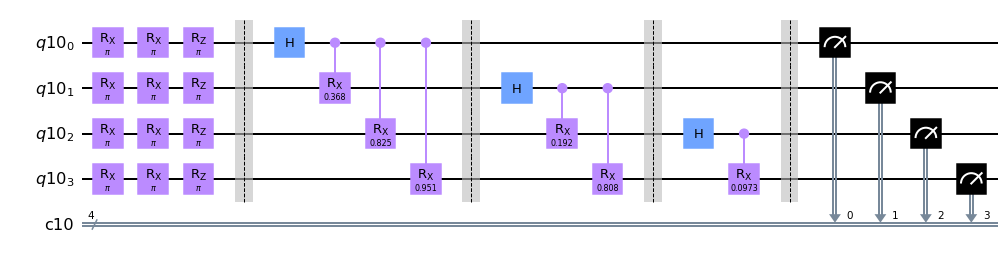

In [27]:
buildCircuit(gen, 1)
gen.draw()

In [11]:
print("Depth of circuit with "+str(numOfQubits)+" qubits has a depth of "+str(gen.depth())+" and a width of "+str(gen.width())+".")

Depth of circuit with 4 qubits has a depth of 10 and a width of 8.


In [28]:
paramList

[0.36828636142040827,
 0.8245061248822559,
 0.9510268816804779,
 0.192357175833205,
 0.8082598368583931,
 0.09728110909894117]

In [35]:
for i in range(len(paramList)):
    grad = random.random()
    if grad < 0.5: 
        paramList[i] = paramList[i]+0.1
    else:
        paramList[i] = paramList[i]-0.1

In [36]:
paramList

[0.5682863614204082,
 0.624506124882256,
 1.151026881680478,
 0.192357175833205,
 0.8082598368583931,
 0.09728110909894117]